PID	Burst Time	Arrival Time	Completion Time	Turnaround Time	Waiting Time
2	8		0		8		8		0
3	7		1		24		23		16
1	6		2		17		15		9
4	3		3		11		8		5

Average Turnaround Time: 13.5
Average Waiting Time: 7.5

Execution Time of Simulation: 0.000000 seconds


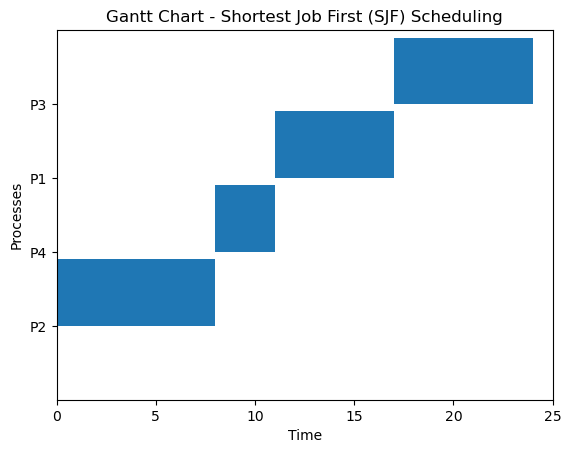

In [15]:
import time
import matplotlib.pyplot as plt

# Define the Process class to store process information
class Process:
    def __init__(self, pid, burst_time, arrival_time):
        self.pid = pid  # Process ID
        self.burst_time = burst_time  # Burst time
        self.arrival_time = arrival_time  # Arrival time
        self.completion_time = 0  # Completion time
        self.turnaround_time = 0  # Turnaround time
        self.waiting_time = 0  # Waiting time

# Function to calculate the scheduling using Shortest Job First (SJF)
def shortest_job_first(processes):
    n = len(processes)
    processes.sort(key=lambda x: (x.arrival_time, x.burst_time))  # Sort by arrival and burst time

    completed = 0
    current_time = 0
    gantt_chart = []  # List to store the Gantt chart entries
    
    while completed < n:
        # Find process with the shortest burst time that has arrived
        ready_queue = [p for p in processes if p.arrival_time <= current_time and p.completion_time == 0]
        if ready_queue:
            ready_queue.sort(key=lambda x: x.burst_time)
            process = ready_queue[0]

            # Simulate the execution
            gantt_chart.append((process.pid, current_time, current_time + process.burst_time))  # Gantt chart data
            current_time += process.burst_time
            process.completion_time = current_time
            process.turnaround_time = process.completion_time - process.arrival_time
            process.waiting_time = process.turnaround_time - process.burst_time

            completed += 1
        else:
            current_time += 1  # If no process has arrived yet, increment time

    # Return the processes with calculated times and the Gantt chart
    return processes, gantt_chart

# Function to print the results
def print_results(processes):
    print("PID\tBurst Time\tArrival Time\tCompletion Time\tTurnaround Time\tWaiting Time")
    for process in processes:
        print(f"{process.pid}\t{process.burst_time}\t\t{process.arrival_time}\t\t{process.completion_time}\t\t{process.turnaround_time}\t\t{process.waiting_time}")
    
    avg_turnaround_time = sum(p.turnaround_time for p in processes) / len(processes)
    avg_waiting_time = sum(p.waiting_time for p in processes) / len(processes)
    
    print(f"\nAverage Turnaround Time: {avg_turnaround_time}")
    print(f"Average Waiting Time: {avg_waiting_time}")
    
    return avg_turnaround_time, avg_waiting_time

# Function to simulate the scheduling and measure performance metrics
def simulate_sjf(processes):
    start_time = time.time()
    
    # Get scheduled processes and Gantt chart
    scheduled_processes, gantt_chart = shortest_job_first(processes)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    print_results(scheduled_processes)
    
    print(f"\nExecution Time of Simulation: {execution_time:.6f} seconds")
    
    return scheduled_processes, gantt_chart, execution_time

# Function to visualize the Gantt chart
def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()

    gnt.set_xlabel('Time')
    gnt.set_ylabel('Processes')

    # Setting ticks on y-axis
    gnt.set_yticks([10 + 10*i for i in range(len(gantt_chart))])
    gnt.set_yticklabels([f'P{process[0]}' for process in gantt_chart])

    # Setting graph limits
    gnt.set_xlim(0, gantt_chart[-1][2] + 1)
    gnt.set_ylim(0, (len(gantt_chart) + 1) * 10)

    for i, (pid, start, finish) in enumerate(gantt_chart):
        gnt.broken_barh([(start, finish - start)], (10 + 10*i, 9), facecolors=('tab:blue'))

    plt.title('Gantt Chart - Shortest Job First (SJF) Scheduling')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Define processes with PID, burst time, and arrival time
    processes = [
        Process(1, 6, 2),
        Process(2, 8, 0),
        Process(3, 7, 1),
        Process(4, 3, 3)
    ]
    
    # Run simulation and get results
    scheduled_processes, gantt_chart, execution_time = simulate_sjf(processes)

    # Plot the Gantt chart
    plot_gantt_chart(gantt_chart)


PID	Burst Time	Arrival Time	Completion Time	Turnaround Time	Waiting Time
9	3		0		3		3		0
1	1		2		4		2		1
2	7		2		32		30		23
10	9		2		41		39		30
7	5		3		15		12		7
8	1		4		5		1		0
4	2		4		7		3		1
6	3		5		10		5		2
3	5		5		20		15		10
5	5		7		25		18		13

Average Turnaround Time: 12.8
Average Waiting Time: 8.7

Execution Time of Simulation: 0.000000 seconds


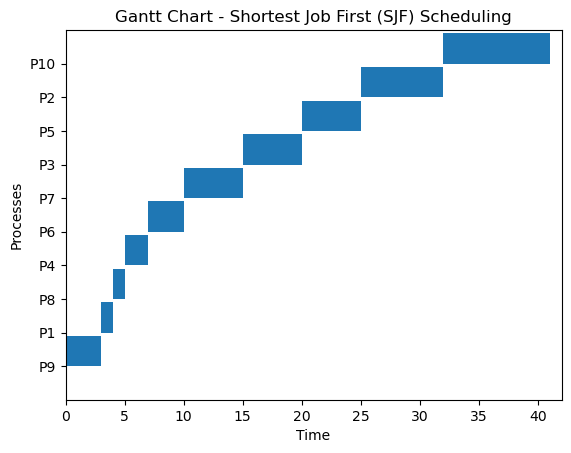

In [19]:
import time
import random
import matplotlib.pyplot as plt

# Define the Process class to store process information
class Process:
    def __init__(self, pid, burst_time, arrival_time):
        self.pid = pid  # Process ID
        self.burst_time = burst_time  # Burst time
        self.arrival_time = arrival_time  # Arrival time
        self.completion_time = 0  # Completion time
        self.turnaround_time = 0  # Turnaround time
        self.waiting_time = 0  # Waiting time

# Function to calculate the scheduling using Shortest Job First (SJF)
def shortest_job_first(processes):
    n = len(processes)
    processes.sort(key=lambda x: (x.arrival_time, x.burst_time))  # Sort by arrival and burst time

    completed = 0
    current_time = 0
    gantt_chart = []  # List to store the Gantt chart entries
    
    while completed < n:
        # Find process with the shortest burst time that has arrived
        ready_queue = [p for p in processes if p.arrival_time <= current_time and p.completion_time == 0]
        if ready_queue:
            ready_queue.sort(key=lambda x: x.burst_time)
            process = ready_queue[0]

            # Simulate the execution
            gantt_chart.append((process.pid, current_time, current_time + process.burst_time))  # Gantt chart data
            current_time += process.burst_time
            process.completion_time = current_time
            process.turnaround_time = process.completion_time - process.arrival_time
            process.waiting_time = process.turnaround_time - process.burst_time

            completed += 1
        else:
            current_time += 1  # If no process has arrived yet, increment time

    # Return the processes with calculated times and the Gantt chart
    return processes, gantt_chart

# Function to print the results
def print_results(processes):
    print("PID\tBurst Time\tArrival Time\tCompletion Time\tTurnaround Time\tWaiting Time")
    for process in processes:
        print(f"{process.pid}\t{process.burst_time}\t\t{process.arrival_time}\t\t{process.completion_time}\t\t{process.turnaround_time}\t\t{process.waiting_time}")
    
    avg_turnaround_time = sum(p.turnaround_time for p in processes) / len(processes)
    avg_waiting_time = sum(p.waiting_time for p in processes) / len(processes)
    
    print(f"\nAverage Turnaround Time: {avg_turnaround_time}")
    print(f"Average Waiting Time: {avg_waiting_time}")
    
    return avg_turnaround_time, avg_waiting_time

# Function to simulate the scheduling and measure performance metrics
def simulate_sjf(processes):
    start_time = time.time()
    
    # Get scheduled processes and Gantt chart
    scheduled_processes, gantt_chart = shortest_job_first(processes)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    print_results(scheduled_processes)
    
    print(f"\nExecution Time of Simulation: {execution_time:.6f} seconds")
    
    return scheduled_processes, gantt_chart, execution_time

# Function to generate random processes
def generate_random_processes(num_processes, max_burst_time=10, max_arrival_time=10):
    processes = []
    for i in range(num_processes):
        pid = i + 1  # Process ID
        burst_time = random.randint(1, max_burst_time)  # Random burst time between 1 and max_burst_time
        arrival_time = random.randint(0, max_arrival_time)  # Random arrival time between 0 and max_arrival_time
        processes.append(Process(pid, burst_time, arrival_time))
    return processes

# Function to visualize the Gantt chart
def plot_gantt_chart(gantt_chart):
    fig, gnt = plt.subplots()

    gnt.set_xlabel('Time')
    gnt.set_ylabel('Processes')

    # Setting ticks on y-axis
    gnt.set_yticks([10 + 10*i for i in range(len(gantt_chart))])
    gnt.set_yticklabels([f'P{process[0]}' for process in gantt_chart])

    # Setting graph limits
    gnt.set_xlim(0, gantt_chart[-1][2] + 1)
    gnt.set_ylim(0, (len(gantt_chart) + 1) * 10)

    for i, (pid, start, finish) in enumerate(gantt_chart):
        gnt.broken_barh([(start, finish - start)], (10 + 10*i, 9), facecolors=('tab:blue'))

    plt.title('Gantt Chart - Shortest Job First (SJF) Scheduling')
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Generate random processes
    num_processes = 10  # You can adjust this number to generate more processes
    processes = generate_random_processes(num_processes)

    # Run simulation and get results
    scheduled_processes, gantt_chart, execution_time = simulate_sjf(processes)

    # Plot the Gantt chart
    plot_gantt_chart(gantt_chart)


## Reinforcement-learning Based scheduler

In [36]:
import random
import numpy as np

# Define the Process class to store process information
class Process:
    def __init__(self, pid, burst_time, arrival_time):
        self.pid = pid  # Process ID
        self.burst_time = burst_time  # Burst time
        self.arrival_time = arrival_time  # Arrival time
        self.completion_time = 0  # Completion time
        self.turnaround_time = 0  # Turnaround time
        self.waiting_time = 0  # Waiting time

# Define the environment for scheduling
class SchedulerEnv:
    def __init__(self, processes):
        self.processes = processes  # List of Process objects
        self.current_time = 0  # Start at time 0
        self.done = False  # Flag to indicate if all processes are done
        self.completed_processes = []  # Keep track of completed processes

    def reset(self):
        self.current_time = 0
        self.done = False
        self.completed_processes = []
        for process in self.processes:
            process.completion_time = 0
            process.turnaround_time = 0
            process.waiting_time = 0

    def get_ready_queue(self):
        # Return all processes that have arrived and are not yet completed
        return [p for p in self.processes if p.arrival_time <= self.current_time and p.completion_time == 0]

    def is_done(self):
        # If all processes are completed, the environment is done
        return all(p.completion_time > 0 for p in self.processes)

    def step(self, process_index):
        process = self.processes[process_index]
        if process.completion_time == 0:  # If process hasn't been scheduled yet
            # Process execution
            self.current_time += process.burst_time
            process.completion_time = self.current_time
            process.turnaround_time = process.completion_time - process.arrival_time
            process.waiting_time = process.turnaround_time - process.burst_time
            self.completed_processes.append(process)

        # Reward should encourage low waiting and turnaround times
        reward = -process.waiting_time - process.turnaround_time  # Penalize both waiting and turnaround time
        self.done = self.is_done()  # Check if all processes are done

        return reward, self.done

# Q-learning Scheduler
def simulate_rl_scheduler(processes, num_episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.8, epsilon_decay=0.995, min_epsilon=0.01):
    num_processes = len(processes)
    
    # Initialize Q-table
    q_table = np.zeros((num_processes, num_processes))  # Each row is a state (current process), each column is an action (next process)
    
    for episode in range(num_episodes):
        # Reset environment at the start of each episode
        env = SchedulerEnv(processes.copy())
        env.reset()

        # Initialize the first process (random choice)
        if env.get_ready_queue():
            current_process = random.choice(env.get_ready_queue())
        else:
            continue  # If no process has arrived yet, skip this episode
        
        while not env.is_done():
            # Get index of current process in the process list
            ready_queue = env.get_ready_queue()
            if not ready_queue:
                break  # No processes to schedule, move to next episode
            
            # Get the index of the current process
            current_process_index = processes.index(current_process)

            # Epsilon-greedy action selection
            if random.uniform(0, 1) < epsilon:
                action = random.choice(ready_queue)  # Explore: random action
            else:
                # Exploit: choose the action with the highest Q-value
                action_index = np.argmax(q_table[current_process_index])
                action = processes[action_index]
            
            # Take the action (schedule the process)
            action_index = processes.index(action)
            reward, done = env.step(action_index)
            
            # Update Q-value
            best_next_action = np.argmax(q_table[action_index])
            q_table[current_process_index, action_index] += alpha * (
                reward + gamma * q_table[action_index, best_next_action] - q_table[current_process_index, action_index]
            )
            
            # Move to the next process
            current_process = action

        # Decay epsilon to reduce exploration over time
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        if episode % 100 == 0:
            print(f"Episode {episode}/{num_episodes} completed. Epsilon: {epsilon:.3f}")

    return q_table

# Example usage
if __name__ == "__main__":
    # Generate random processes
    num_processes = 5
    processes = generate_random_processes(num_processes)
    
    # Simulate RL-based scheduling
    q_table = simulate_rl_scheduler(processes, num_episodes=500)

    print("Q-table after training:")
    print(q_table)


Episode 0/500 completed. Epsilon: 0.796
Episode 100/500 completed. Epsilon: 0.482
Episode 200/500 completed. Epsilon: 0.292
Episode 300/500 completed. Epsilon: 0.177
Episode 400/500 completed. Epsilon: 0.107
Q-table after training:
[[-42.47632318 -21.03965248 -39.39979207 -14.39291631  71.04071082]
 [-31.70521768 -35.57964249 -21.17519606 -12.3038925   71.91475604]
 [ 15.90924352  18.53926105 129.99607849  23.48496867  72.92235987]
 [-24.70365854 -18.20961365 -17.41068925 -32.50744719  73.68938393]
 [  4.35072437   6.83542536 129.88878492  -3.90897284  67.4316468 ]]


In [ ]:
import numpy as np
import random

# Assuming Process and SchedulerEnv classes from the previous implementation are already defined here

# Define the First-Come, First-Served (FCFS) scheduling function
def fcfs_scheduling(processes):
    total_waiting_time = 0
    total_turnaround_time = 0
    current_time = 0
    
    for process in processes:
        if current_time < process.arrival_time:
            current_time = process.arrival_time  # Wait for the process to arrive
        
        # Calculate waiting and turnaround time
        process.waiting_time = current_time - process.arrival_time
        process.turnaround_time = process.waiting_time + process.burst_time
        
        # Update current time
        current_time += process.burst_time
        
        total_waiting_time += process.waiting_time
        total_turnaround_time += process.turnaround_time
    
    num_processes = len(processes)
    avg_waiting_time = total_waiting_time / num_processes if num_processes > 0 else 0
    avg_turnaround_time = total_turnaround_time / num_processes if num_processes > 0 else 0
    
    return avg_waiting_time, avg_turnaround_time

# Compare RL-based scheduling with FCFS scheduling
def compare_schedulers(processes, num_episodes=1000):
    # Simulate RL-based scheduling
    q_table = simulate_rl_scheduler(processes, num_episodes)
    
    # Reset processes for FCFS
    processes_fcfs = [Process(p.pid, p.burst_time, p.arrival_time) for p in processes]  # Create new instances for FCFS
    
    # Run FCFS scheduling
    avg_waiting_time_fcfs, avg_turnaround_time_fcfs = fcfs_scheduling(processes_fcfs)

    # Reset processes for RL scheduling
    env = SchedulerEnv(processes.copy())
    env.reset()
    total_waiting_time_rl = 0
    total_turnaround_time_rl = 0
    
    # Run RL-based scheduling
    if env.get_ready_queue():
        current_process = random.choice(env.get_ready_queue())
    else:
        return None  # No process has arrived yet
    
    while not env.is_done():
        ready_queue = env.get_ready_queue()
        if not ready_queue:
            break
        
        current_process_index = processes.index(current_process)
        
        # Epsilon-greedy action selection
        action_index = np.argmax(q_table[current_process_index])  # Exploit learned policy
        action = processes[action_index]
        
        # Take action (schedule the process)
        reward, done = env.step(action_index)
        
        # Update waiting and turnaround times
        total_waiting_time_rl += action.waiting_time
        total_turnaround_time_rl += action.turnaround_time
        
        # Move to the next process
        current_process = action

    num_processes = len(processes)
    avg_waiting_time_rl = total_waiting_time_rl / num_processes if num_processes > 0 else 0
    avg_turnaround_time_rl = total_turnaround_time_rl / num_processes if num_processes > 0 else 0
    
    # Print comparison results
    print(f"FCFS - Average Waiting Time: {avg_waiting_time_fcfs:.2f}, Average Turnaround Time: {avg_turnaround_time_fcfs:.2f}")
    print(f"RL - Average Waiting Time: {avg_waiting_time_rl:.2f}, Average Turnaround Time: {avg_turnaround_time_rl:.2f}")

# Example usage
if __name__ == "__main__":
    # Generate random processes
    num_processes = 5
    processes = generate_random_processes(num_processes)
    
    # Compare RL-based scheduling with FCFS scheduling
    compare_schedulers(processes, num_episodes=500)


Episode 0/500 completed. Epsilon: 0.796
Episode 100/500 completed. Epsilon: 0.482
Episode 200/500 completed. Epsilon: 0.292
Episode 300/500 completed. Epsilon: 0.177
Episode 400/500 completed. Epsilon: 0.107


Average Waiting Time: 14.40
Average Turnaround Time: 19.50
Throughput: 0.19 jobs/unit time


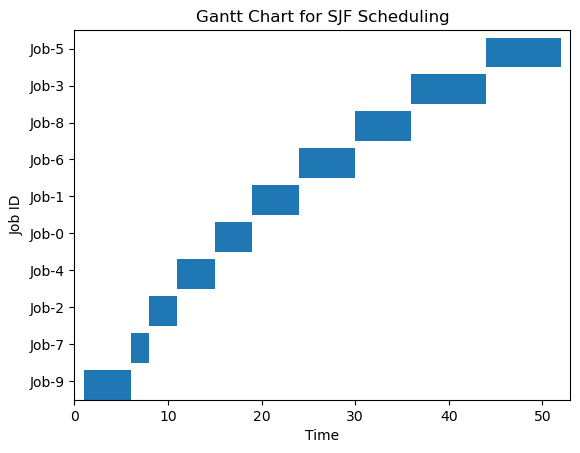

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulated job structure
class Job:
    def __init__(self, job_id, arrival_time, burst_time):
        self.job_id = job_id
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.completion_time = 0
        self.waiting_time = 0
        self.turnaround_time = 0

# Function to schedule using Shortest Job First (SJF) - non-preemptive
def sjf_scheduling(jobs):
    n = len(jobs)
    jobs.sort(key=lambda x: (x.arrival_time, x.burst_time))  # Sort by arrival time first, then burst time
    current_time = 0
    completed_jobs = []

    while jobs:
        # Find jobs that have arrived by current_time
        available_jobs = [job for job in jobs if job.arrival_time <= current_time]
        
        if available_jobs:
            # Select job with the shortest burst time
            shortest_job = min(available_jobs, key=lambda x: x.burst_time)
            jobs.remove(shortest_job)
            
            # Compute job start and completion times
            current_time += shortest_job.burst_time
            shortest_job.completion_time = current_time
            shortest_job.turnaround_time = shortest_job.completion_time - shortest_job.arrival_time
            shortest_job.waiting_time = shortest_job.turnaround_time - shortest_job.burst_time
            completed_jobs.append(shortest_job)
        else:
            # If no jobs have arrived yet, move forward in time
            current_time += 1

    return completed_jobs

# Performance metrics calculation
def calculate_metrics(completed_jobs):
    n = len(completed_jobs)
    total_waiting_time = sum([job.waiting_time for job in completed_jobs])
    total_turnaround_time = sum([job.turnaround_time for job in completed_jobs])
    
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    throughput = n / max([job.completion_time for job in completed_jobs])
    
    return avg_waiting_time, avg_turnaround_time, throughput

# Plot Gantt chart
def plot_gantt_chart(completed_jobs):
    fig, gnt = plt.subplots()

    gnt.set_xlabel('Time')
    gnt.set_ylabel('Job ID')

    # Set limits for x-axis (time) and y-axis (jobs)
    gnt.set_xlim(0, max([job.completion_time for job in completed_jobs]) + 1)
    gnt.set_ylim(0, len(completed_jobs))

    # Set labels for job IDs on y-axis
    gnt.set_yticks(np.arange(0.5, len(completed_jobs), 1))
    gnt.set_yticklabels([job.job_id for job in completed_jobs])

    # Plot Gantt chart bars for each job
    for i, job in enumerate(completed_jobs):
        gnt.broken_barh([(job.completion_time - job.burst_time, job.burst_time)], (i, 0.8), facecolors='tab:blue')

    plt.title('Gantt Chart for SJF Scheduling')
    plt.show()

# Simulated GPU job scheduling use case
def simulate_gpu_scheduling():
    # Example jobs with random burst times (execution time) and arrival times
    np.random.seed(42)
    num_jobs = 10
    jobs = []
    
    for i in range(num_jobs):
        arrival_time = np.random.randint(0, 10)
        burst_time = np.random.randint(1, 10)
        jobs.append(Job(f'Job-{i}', arrival_time, burst_time))

    # Schedule the jobs using SJF
    completed_jobs = sjf_scheduling(jobs)

    # Calculate performance metrics
    avg_waiting_time, avg_turnaround_time, throughput = calculate_metrics(completed_jobs)

    print(f'Average Waiting Time: {avg_waiting_time:.2f}')
    print(f'Average Turnaround Time: {avg_turnaround_time:.2f}')
    print(f'Throughput: {throughput:.2f} jobs/unit time')

    # Plot Gantt chart for job execution
    plot_gantt_chart(completed_jobs)

# Run the simulation
simulate_gpu_scheduling()



SJF Performance Metrics:
Average Waiting Time: 18.40
Average Turnaround Time: 24.60
Throughput: 0.16 jobs/unit time

RR Performance Metrics (Time Quantum = 3):
Average Waiting Time: 30.60
Average Turnaround Time: 36.80
Throughput: 0.16 jobs/unit time


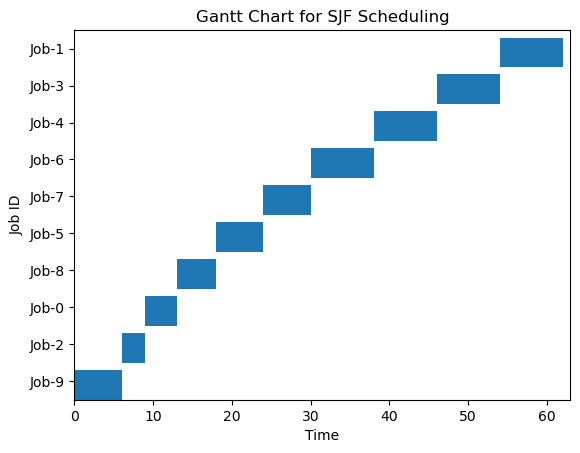

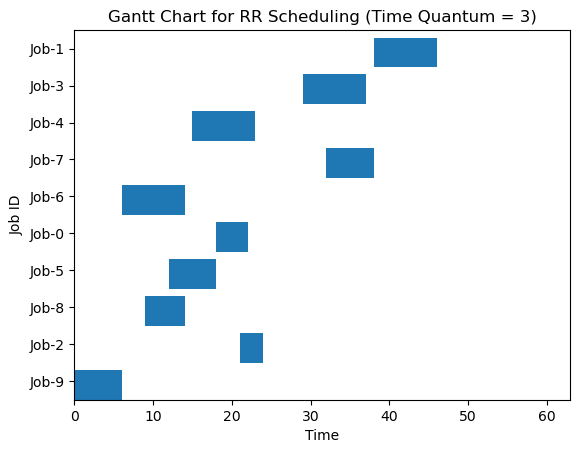

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import deque

# Simulated job structure (same as before)
class Job:
    def __init__(self, job_id, arrival_time, burst_time):
        self.job_id = job_id
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time
        self.completion_time = 0
        self.waiting_time = 0
        self.turnaround_time = 0
        self.start_time = -1

# Function to schedule using Shortest Job First (SJF) - non-preemptive
def sjf_scheduling(jobs):
    jobs.sort(key=lambda x: (x.arrival_time, x.burst_time))  # Sort by arrival and burst time
    current_time = 0
    completed_jobs = []

    while jobs:
        available_jobs = [job for job in jobs if job.arrival_time <= current_time]

        if available_jobs:
            shortest_job = min(available_jobs, key=lambda x: x.burst_time)
            jobs.remove(shortest_job)
            if shortest_job.start_time == -1:
                shortest_job.start_time = current_time
            current_time += shortest_job.burst_time
            shortest_job.completion_time = current_time
            shortest_job.turnaround_time = shortest_job.completion_time - shortest_job.arrival_time
            shortest_job.waiting_time = shortest_job.turnaround_time - shortest_job.burst_time
            completed_jobs.append(shortest_job)
        else:
            current_time += 1

    return completed_jobs

# Function to schedule using Round Robin (RR) - preemptive
def rr_scheduling(jobs, time_quantum):
    jobs.sort(key=lambda x: x.arrival_time)  # Sort by arrival time
    current_time = 0
    queue = deque()
    completed_jobs = []
    jobs_in_queue = set()
    
    while jobs or queue:
        while jobs and jobs[0].arrival_time <= current_time:
            queue.append(jobs.pop(0))

        if queue:
            current_job = queue.popleft()
            if current_job.start_time == -1:
                current_job.start_time = current_time

            # Execute the job for time quantum or remaining time
            execution_time = min(time_quantum, current_job.remaining_time)
            current_time += execution_time
            current_job.remaining_time -= execution_time

            # If job is completed, calculate metrics
            if current_job.remaining_time == 0:
                current_job.completion_time = current_time
                current_job.turnaround_time = current_job.completion_time - current_job.arrival_time
                current_job.waiting_time = current_job.turnaround_time - current_job.burst_time
                completed_jobs.append(current_job)
            else:
                queue.append(current_job)
        else:
            current_time += 1

    return completed_jobs

# Performance metrics calculation (same as SJF)
def calculate_metrics(completed_jobs):
    n = len(completed_jobs)
    total_waiting_time = sum([job.waiting_time for job in completed_jobs])
    total_turnaround_time = sum([job.turnaround_time for job in completed_jobs])
    
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    throughput = n / max([job.completion_time for job in completed_jobs])
    
    return avg_waiting_time, avg_turnaround_time, throughput

# Plot Gantt chart for job scheduling
def plot_gantt_chart(completed_jobs, title):
    fig, gnt = plt.subplots()

    gnt.set_xlabel('Time')
    gnt.set_ylabel('Job ID')

    gnt.set_xlim(0, max([job.completion_time for job in completed_jobs]) + 1)
    gnt.set_ylim(0, len(completed_jobs))

    gnt.set_yticks(np.arange(0.5, len(completed_jobs), 1))
    gnt.set_yticklabels([job.job_id for job in completed_jobs])

    for i, job in enumerate(completed_jobs):
        gnt.broken_barh([(job.start_time, job.burst_time)], (i, 0.8), facecolors='tab:blue')

    plt.title(title)
    plt.show()

# Simulated GPU job scheduling use case with both algorithms
def simulate_gpu_scheduling():
    np.random.seed(42)
    num_jobs = 10
    jobs = []

    # Generate random jobs with arrival times and burst times
    for i in range(num_jobs):
        arrival_time = np.random.randint(0, 20)
        burst_time = np.random.randint(1, 10)
        jobs.append(Job(f'Job-{i}', arrival_time, burst_time))

    # Clone jobs for RR scheduling
    jobs_rr = [Job(job.job_id, job.arrival_time, job.burst_time) for job in jobs]

    # Schedule using SJF
    completed_jobs_sjf = sjf_scheduling(jobs)

    # Schedule using Round Robin (RR) with a time quantum of 3
    time_quantum = 3
    completed_jobs_rr = rr_scheduling(jobs_rr, time_quantum)

    # Calculate performance metrics
    sjf_avg_waiting_time, sjf_avg_turnaround_time, sjf_throughput = calculate_metrics(completed_jobs_sjf)
    rr_avg_waiting_time, rr_avg_turnaround_time, rr_throughput = calculate_metrics(completed_jobs_rr)

    # Display metrics comparison
    print("\nSJF Performance Metrics:")
    print(f'Average Waiting Time: {sjf_avg_waiting_time:.2f}')
    print(f'Average Turnaround Time: {sjf_avg_turnaround_time:.2f}')
    print(f'Throughput: {sjf_throughput:.2f} jobs/unit time')

    print("\nRR Performance Metrics (Time Quantum = 3):")
    print(f'Average Waiting Time: {rr_avg_waiting_time:.2f}')
    print(f'Average Turnaround Time: {rr_avg_turnaround_time:.2f}')
    print(f'Throughput: {rr_throughput:.2f} jobs/unit time')

    # Plot Gantt charts for SJF and RR
    plot_gantt_chart(completed_jobs_sjf, 'Gantt Chart for SJF Scheduling')
    plot_gantt_chart(completed_jobs_rr, 'Gantt Chart for RR Scheduling (Time Quantum = 3)')

# Run the simulation
simulate_gpu_scheduling()
